In [1]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq , os
from qiskit.providers.fake_provider import *
import numpy as np
emulator_aer_dm = Aer.get_backend('aer_simulator_density_matrix')

In [2]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
import random; selected_fakes = random.sample(all_fakes, 5)
selected_fakes

[qiskit.providers.fake_provider.backends.bogota.fake_bogota.FakeBogotaV2,
 qiskit.providers.fake_provider.backends.armonk.fake_armonk.FakeArmonkV2,
 qiskit.providers.fake_provider.backends.melbourne.fake_melbourne.FakeMelbourneV2,
 qiskit.providers.fake_provider.backends.yorktown.fake_yorktown.FakeYorktownV2,
 qiskit.providers.fake_provider.backends.prague.fake_prague.FakePrague]

In [3]:
benchmarks = [
    (supermarq.bit_code.BitCode(3, 3, [1, 0, 1]), "bitcode3"),
    (supermarq.ghz.GHZ(3), "ghz3"),
    (supermarq.hamiltonian_simulation.HamiltonianSimulation(3), "hsim3"),
    (supermarq.mermin_bell.MerminBell(3), "marmin_bell_3"),
    (supermarq.qaoa_fermionic_swap_proxy.QAOAFermionicSwapProxy(3), "qaoa_swap_proxy3"),
    (supermarq.qaoa_vanilla_proxy.QAOAVanillaProxy(3), "qaoa_vanilla_proxy3"),]  

for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print("\n------------------------------",i[1],"-----------------------------")
    #print(circuit.draw())


------------------------------ bitcode3 -----------------------------

------------------------------ ghz3 -----------------------------

------------------------------ hsim3 -----------------------------

------------------------------ marmin_bell_3 -----------------------------

------------------------------ qaoa_swap_proxy3 -----------------------------

------------------------------ qaoa_vanilla_proxy3 -----------------------------


In [4]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'bitcode3': [0.4, 0.5, 0.8571428571428571, 0.6142857142857143, 0.46153846153846156, 0.0], 'ghz3': [0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0], 'hsim3': [0.6666666666666666, 1.0, 0.26666666666666666, 0.7333333333333333, 0.0, 0.25], 'marmin_bell_3': [1.0, 1.0, 0.4375, 0.6666666666666666, 0.0, 0.11538461538461542], 'qaoa_swap_proxy3': [0.6666666666666666, 1.0, 0.5, 0.6666666666666666, 0.0, 0.09999999999999998], 'qaoa_vanilla_proxy3': [1.0, 1.0, 0.4, 0.6666666666666666, 0.0, 0.125]}


In [5]:
jobs =[]
for backend in selected_fakes:
    fake=backend
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        job = fake().run(circuit, shots=1000)
        result=job.result()
        counts = job.result(0).get_counts()
        score = benchmark.score(counts)
        print(score)
        #counts=job.result(0).count()
        jobs.append((label,benchmark,fake,job,score))
#jobs

0.0
0.8869997181509816
0.9507799427400593
0.4895
0.3739989546327933
0.903333390542127
0.0
0.962885500404821
0.9952200572599408
0.5
0.333331950572478
0.9846667354117792
0.0
0.8697096267933266
0.9397799427400593
0.4925
0.37933233221447404
0.8873333882726874
0.0
0.7655340298978615
0.9037799427400592
0.4885
0.39666580935493634
0.7900000411335955
0.0
0.9584718154547301
0.9724466094067259
0.4945
0.3473320667243899
0.9706667334260194


In [6]:
def cut(j):
    l= str(j)
    import re; parts = l.split(".")
    j=parts[5]
    return j

all_scores={}   
for i in selected_fakes:
    fakes=i
    #print("SELCETED_FAKES:: ",i)
    i={}
    for label,benchmark,backend,job,score in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(cut(fakes))
    all_scores[device_scores]= i
print(all_scores)

{'device_score_fake_bogota': {'bitcode3': 0.0, 'ghz3': 0.8869997181509816, 'hsim3': 0.9507799427400593, 'marmin_bell_3': 0.4895, 'qaoa_swap_proxy3': 0.3739989546327933, 'qaoa_vanilla_proxy3': 0.903333390542127}, 'device_score_fake_armonk': {'bitcode3': 0.0, 'ghz3': 0.962885500404821, 'hsim3': 0.9952200572599408, 'marmin_bell_3': 0.5, 'qaoa_swap_proxy3': 0.333331950572478, 'qaoa_vanilla_proxy3': 0.9846667354117792}, 'device_score_fake_melbourne': {'bitcode3': 0.0, 'ghz3': 0.8697096267933266, 'hsim3': 0.9397799427400593, 'marmin_bell_3': 0.4925, 'qaoa_swap_proxy3': 0.37933233221447404, 'qaoa_vanilla_proxy3': 0.8873333882726874}, 'device_score_fake_yorktown': {'bitcode3': 0.0, 'ghz3': 0.7655340298978615, 'hsim3': 0.9037799427400592, 'marmin_bell_3': 0.4885, 'qaoa_swap_proxy3': 0.39666580935493634, 'qaoa_vanilla_proxy3': 0.7900000411335955}, 'device_score_fake_prague': {'bitcode3': 0.0, 'ghz3': 0.9584718154547301, 'hsim3': 0.9724466094067259, 'marmin_bell_3': 0.4945, 'qaoa_swap_proxy3': 0.

USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.bogota.fake_bogota.FakeBogotaV2'> CIRCUIT_NAME: bitcode3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.0


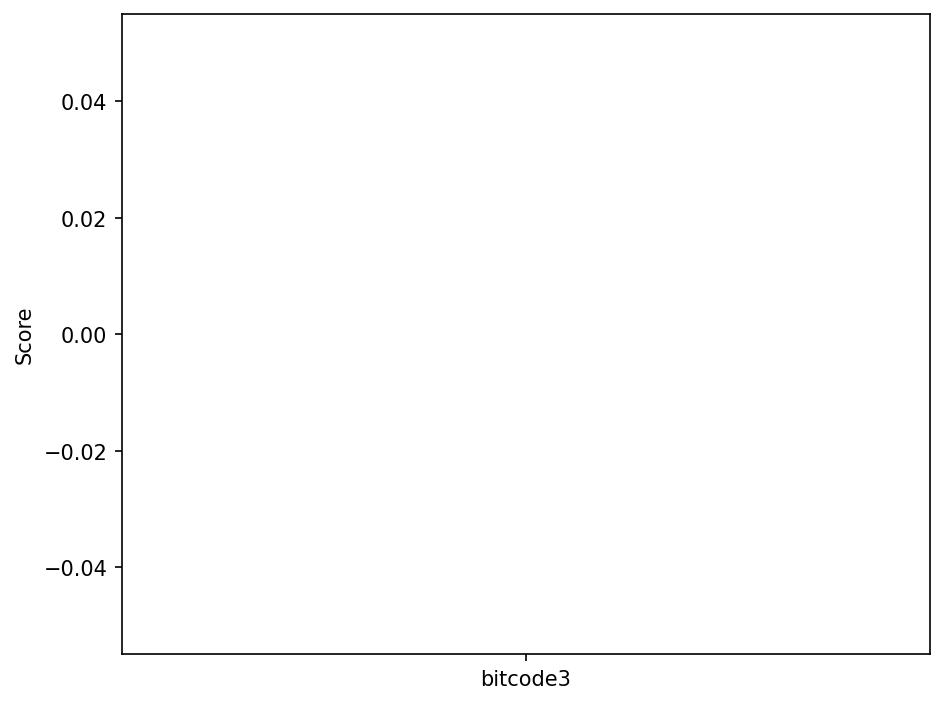

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.bogota.fake_bogota.FakeBogotaV2'> CIRCUIT_NAME: ghz3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.8869997181509816


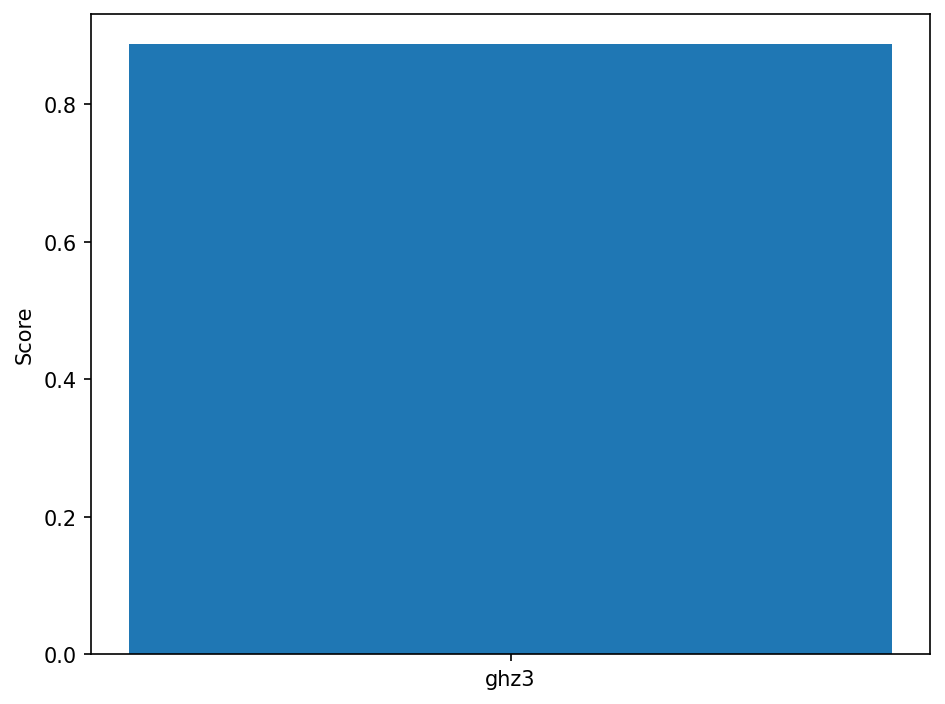

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.bogota.fake_bogota.FakeBogotaV2'> CIRCUIT_NAME: hsim3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.9507799427400593


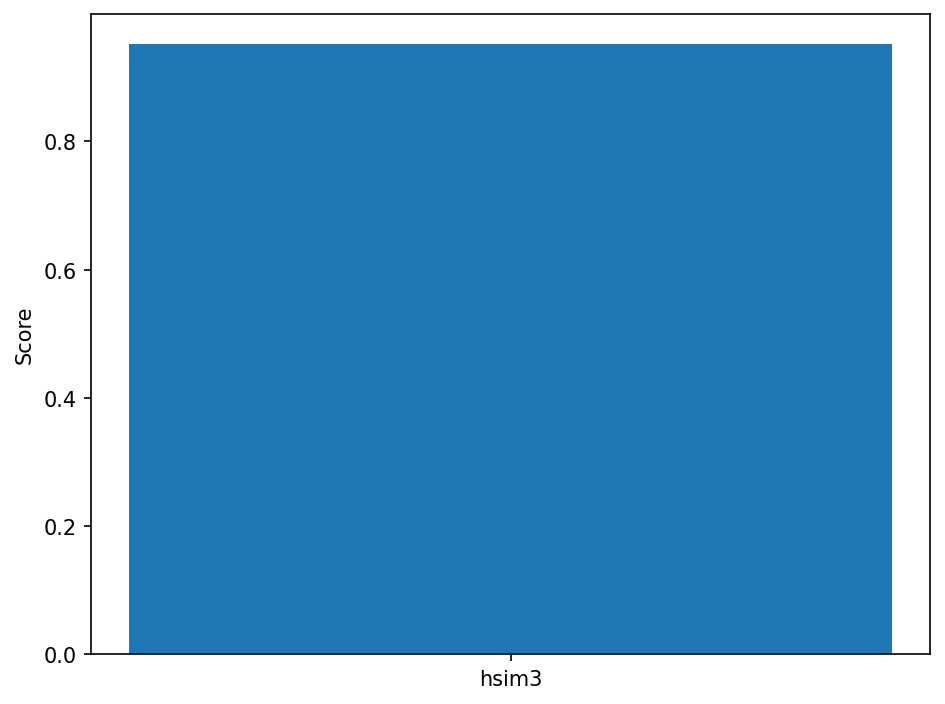

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.bogota.fake_bogota.FakeBogotaV2'> CIRCUIT_NAME: marmin_bell_3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.4895


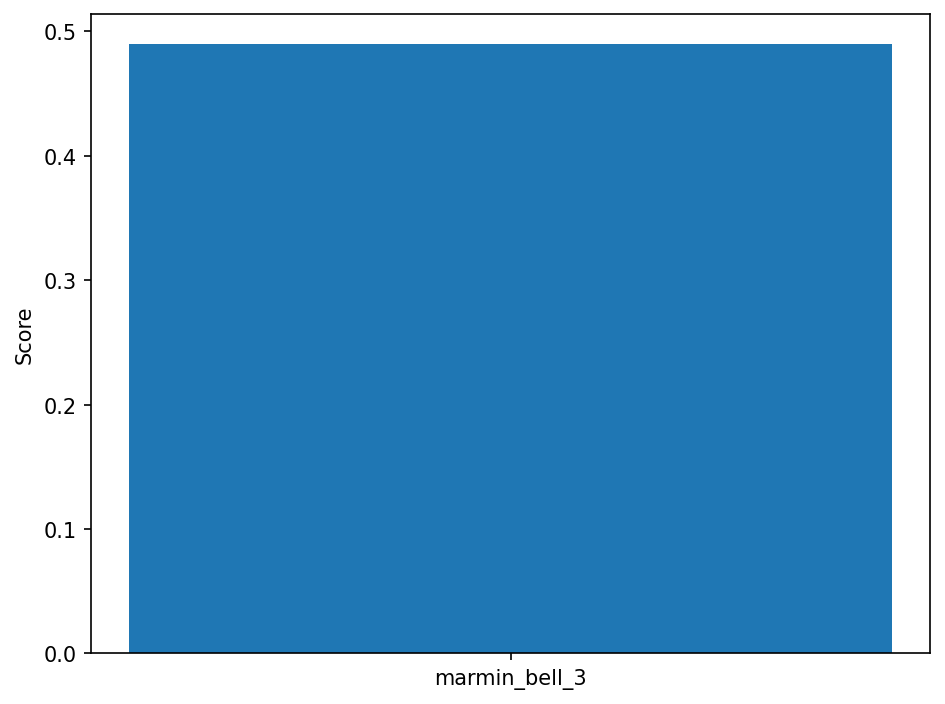

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.bogota.fake_bogota.FakeBogotaV2'> CIRCUIT_NAME: qaoa_swap_proxy3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.3739989546327933


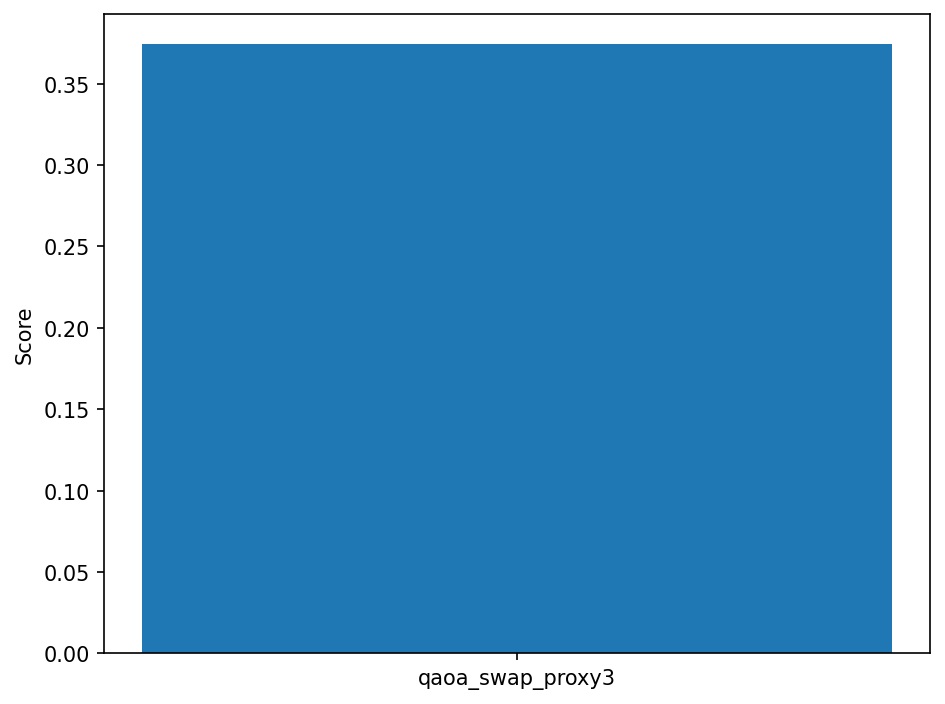

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.bogota.fake_bogota.FakeBogotaV2'> CIRCUIT_NAME: qaoa_vanilla_proxy3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.903333390542127


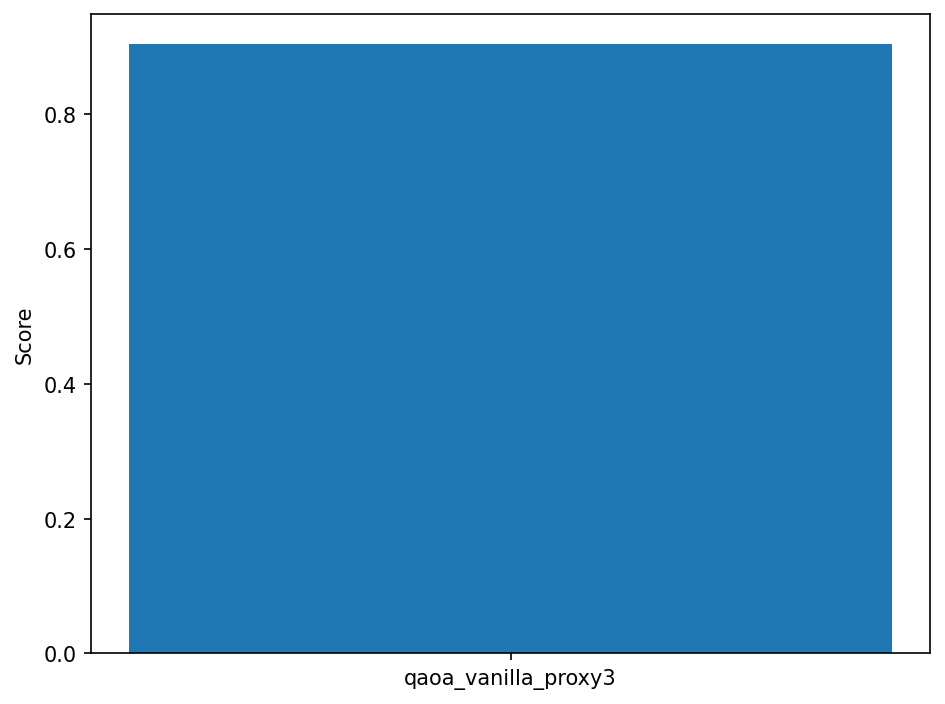

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.armonk.fake_armonk.FakeArmonkV2'> CIRCUIT_NAME: bitcode3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.0


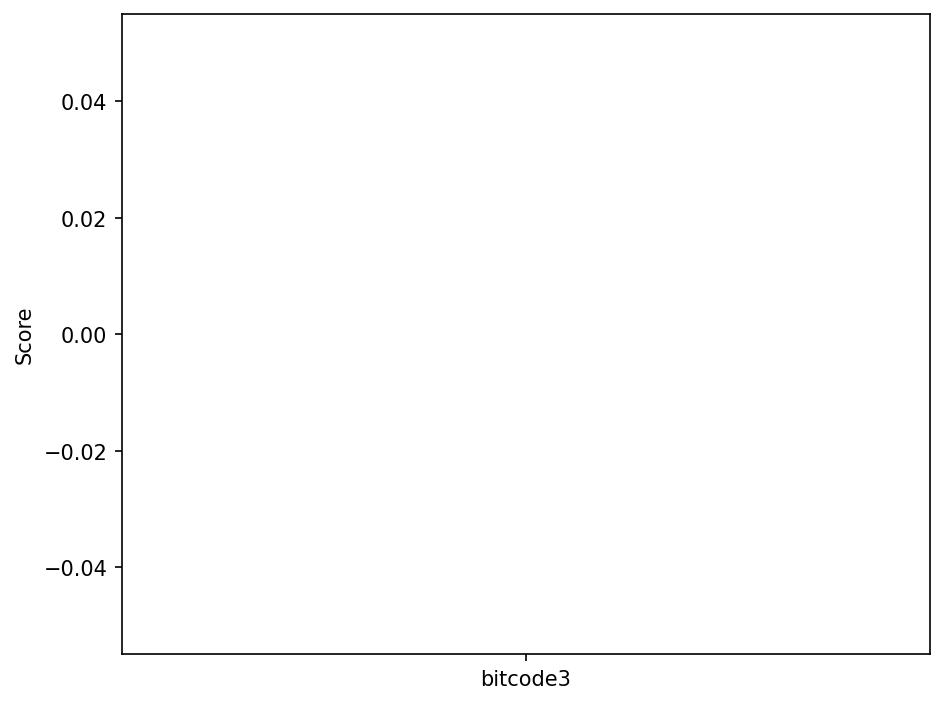

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.armonk.fake_armonk.FakeArmonkV2'> CIRCUIT_NAME: ghz3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.962885500404821


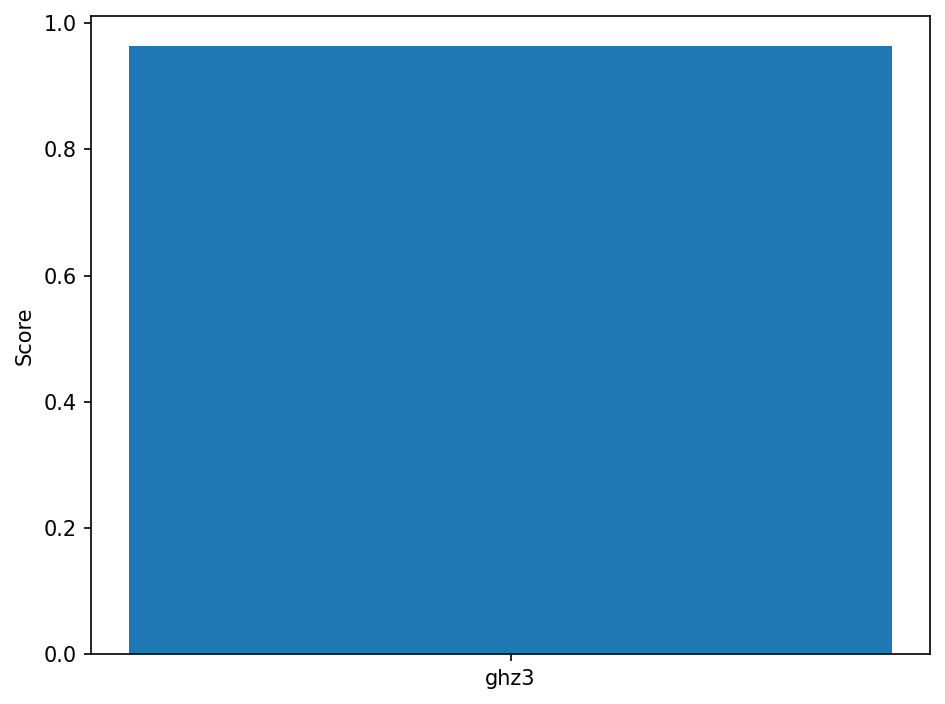

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.armonk.fake_armonk.FakeArmonkV2'> CIRCUIT_NAME: hsim3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.9952200572599408


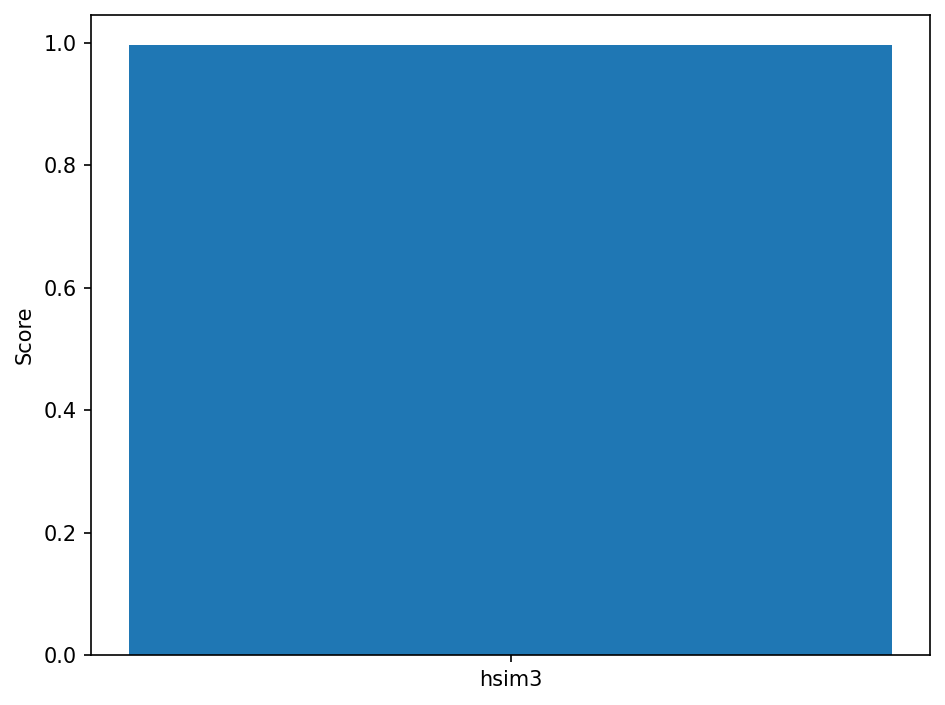

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.armonk.fake_armonk.FakeArmonkV2'> CIRCUIT_NAME: marmin_bell_3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.5


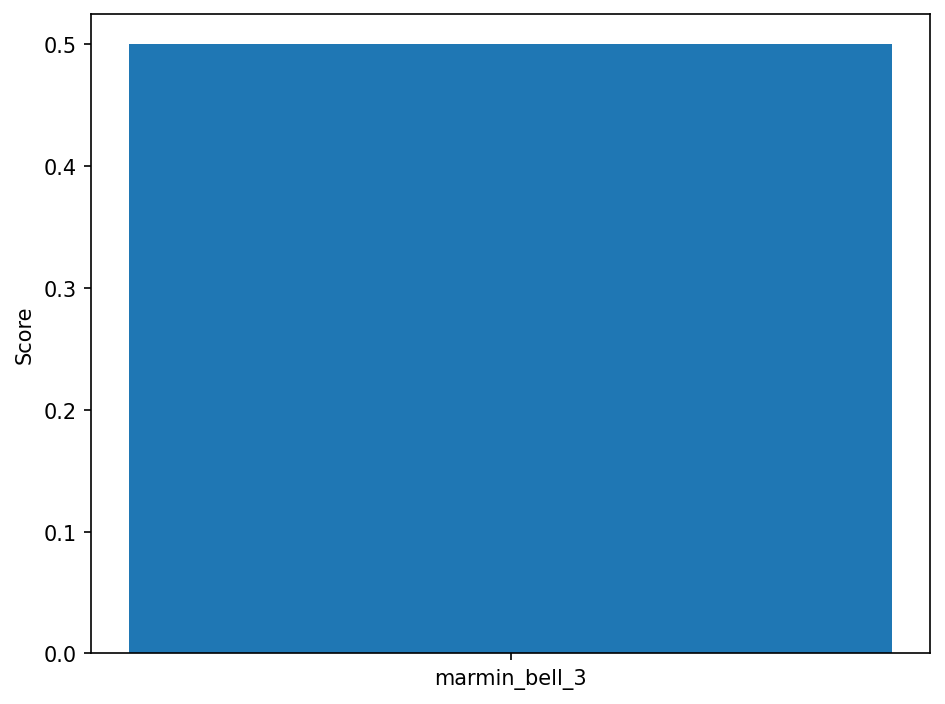

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.armonk.fake_armonk.FakeArmonkV2'> CIRCUIT_NAME: qaoa_swap_proxy3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.333331950572478


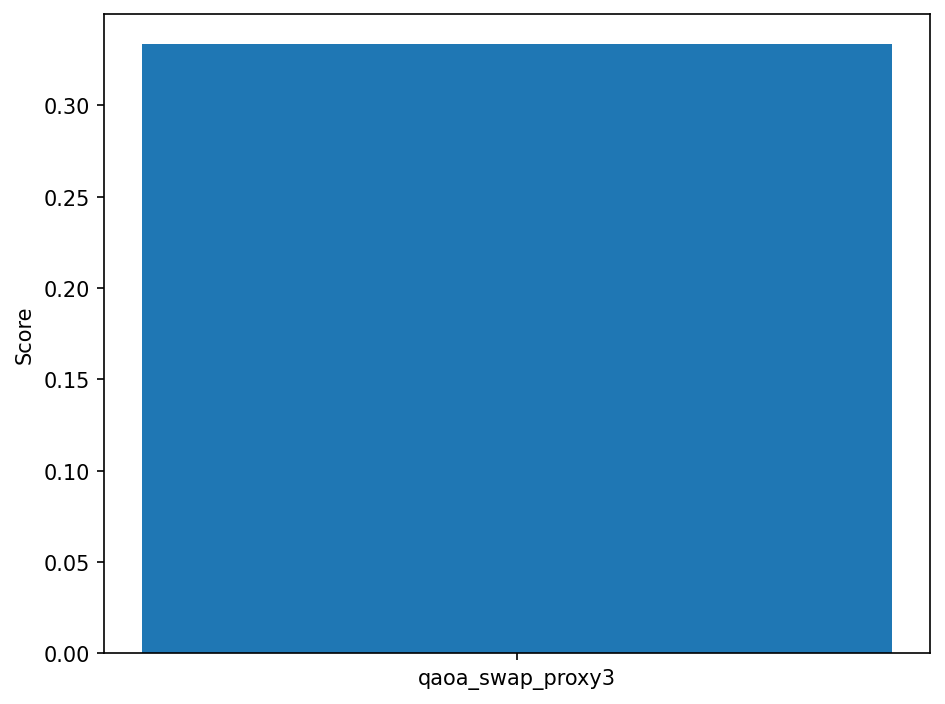

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.armonk.fake_armonk.FakeArmonkV2'> CIRCUIT_NAME: qaoa_vanilla_proxy3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.9846667354117792


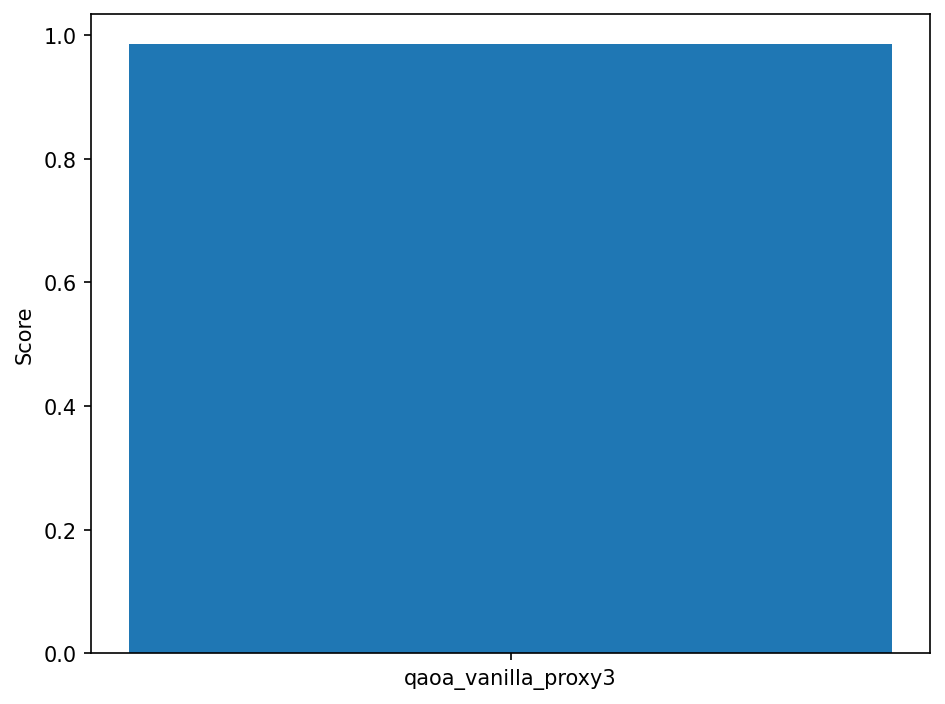

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.melbourne.fake_melbourne.FakeMelbourneV2'> CIRCUIT_NAME: bitcode3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.0


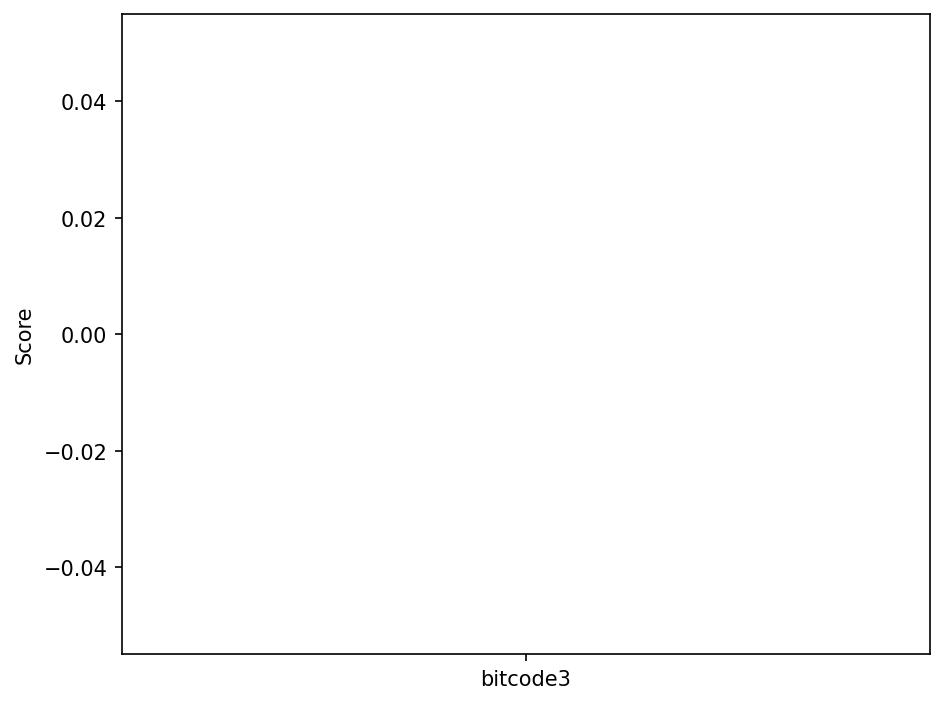

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.melbourne.fake_melbourne.FakeMelbourneV2'> CIRCUIT_NAME: ghz3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.8697096267933266


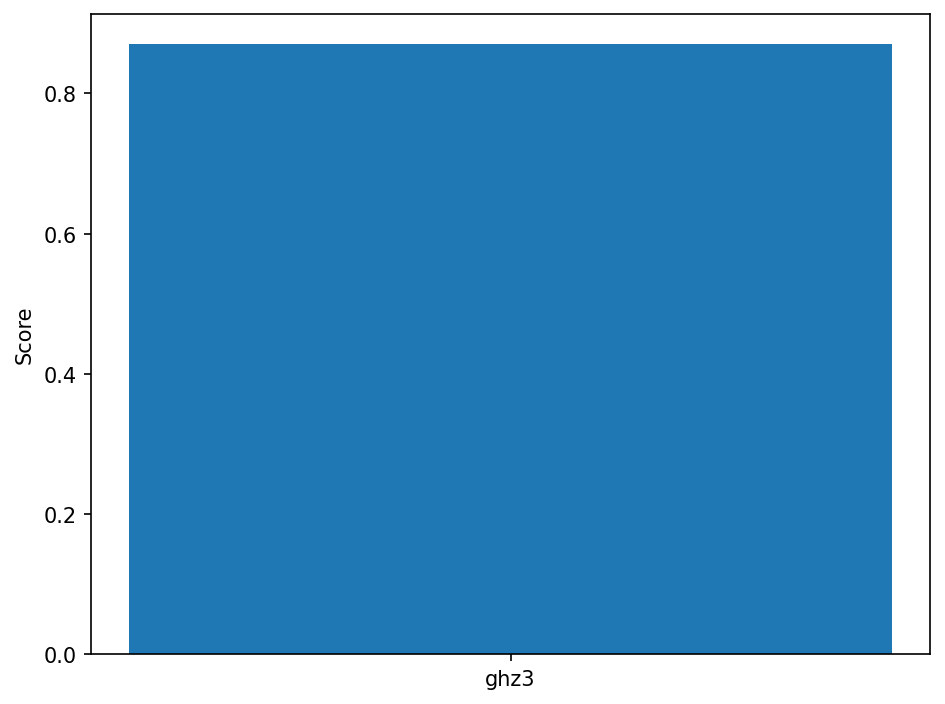

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.melbourne.fake_melbourne.FakeMelbourneV2'> CIRCUIT_NAME: hsim3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.9397799427400593


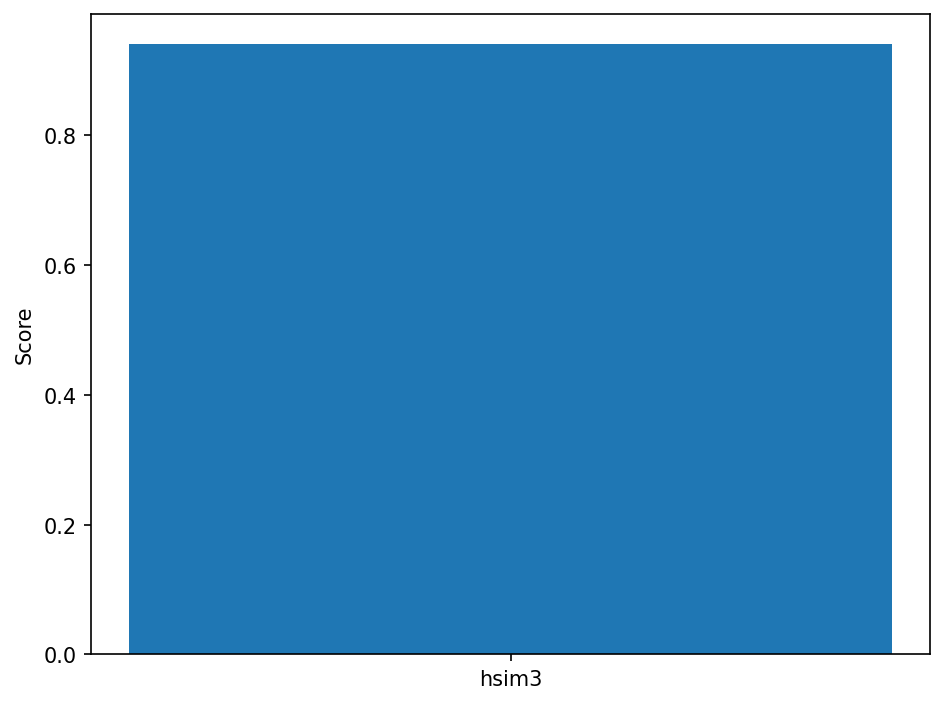

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.melbourne.fake_melbourne.FakeMelbourneV2'> CIRCUIT_NAME: marmin_bell_3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.4925


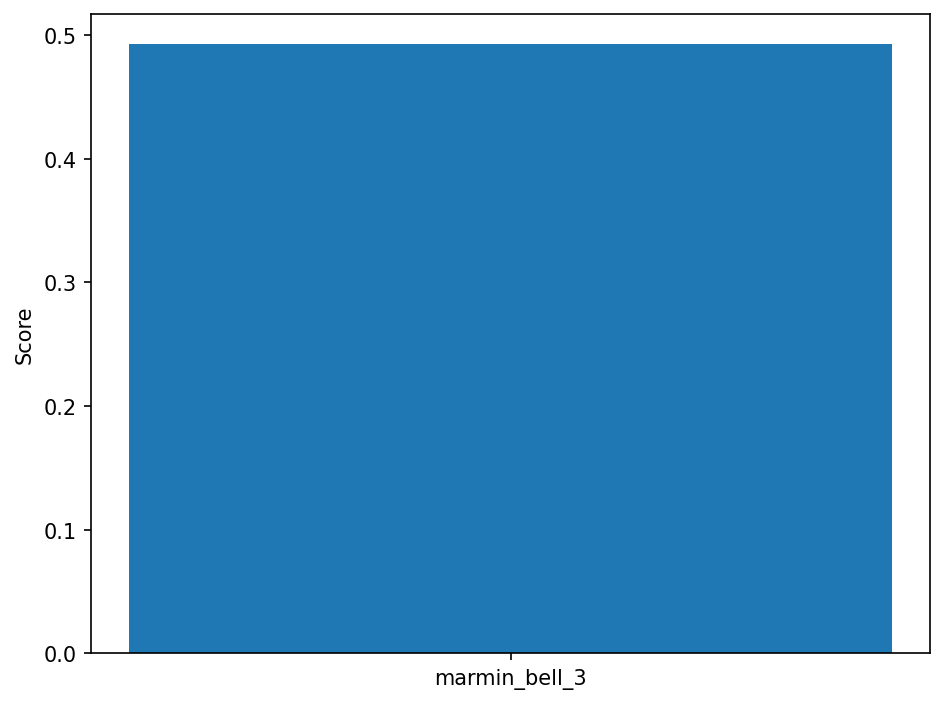

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.melbourne.fake_melbourne.FakeMelbourneV2'> CIRCUIT_NAME: qaoa_swap_proxy3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.37933233221447404


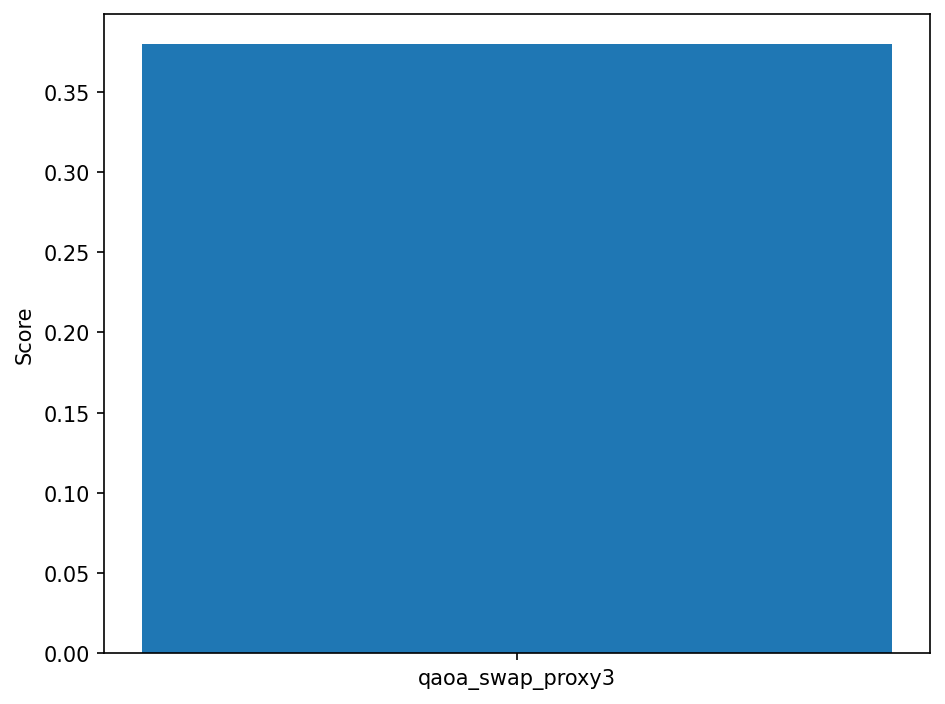

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.melbourne.fake_melbourne.FakeMelbourneV2'> CIRCUIT_NAME: qaoa_vanilla_proxy3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.8873333882726874


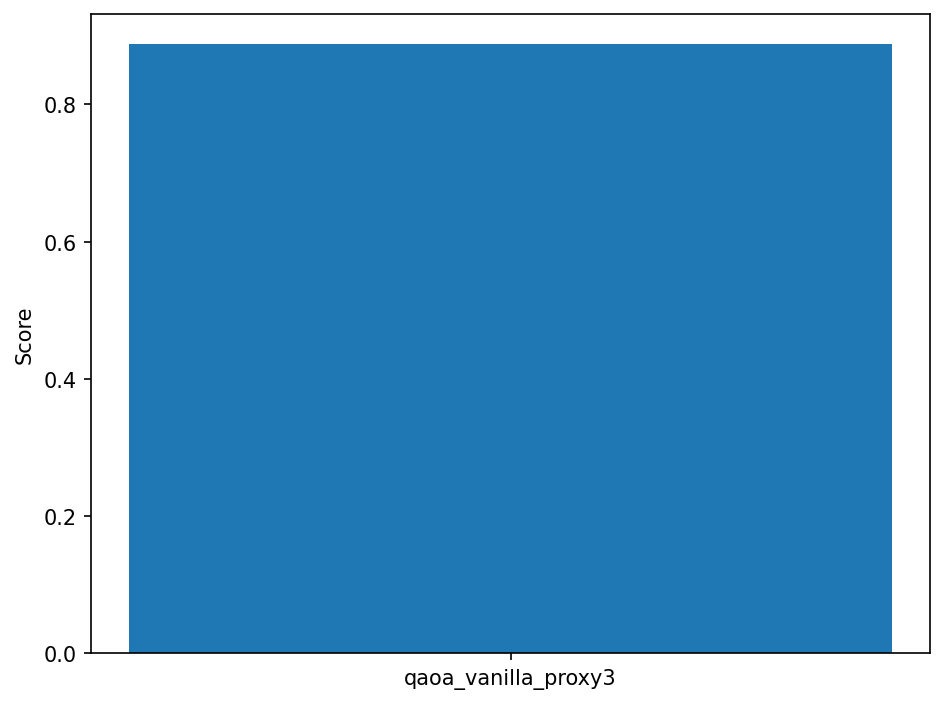

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.yorktown.fake_yorktown.FakeYorktownV2'> CIRCUIT_NAME: bitcode3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.0


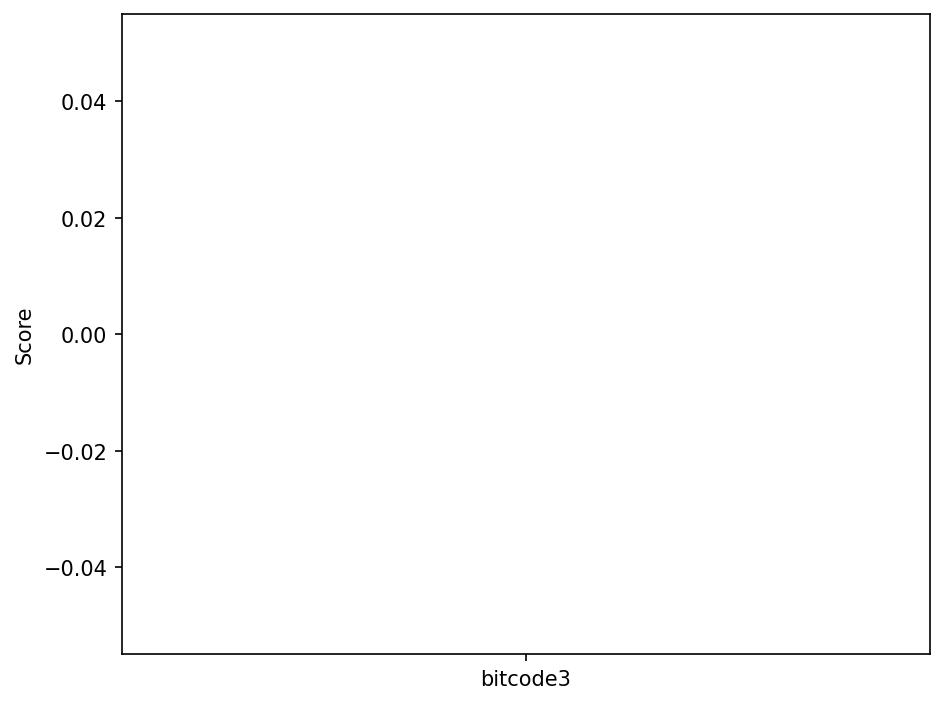

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.yorktown.fake_yorktown.FakeYorktownV2'> CIRCUIT_NAME: ghz3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.7655340298978615


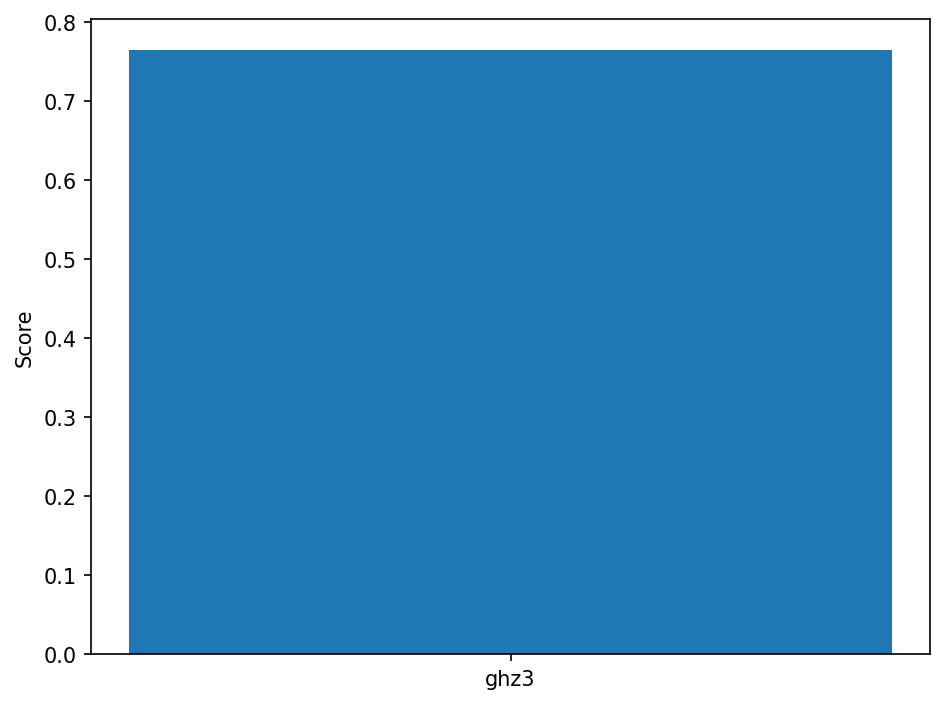

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.yorktown.fake_yorktown.FakeYorktownV2'> CIRCUIT_NAME: hsim3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.9037799427400592


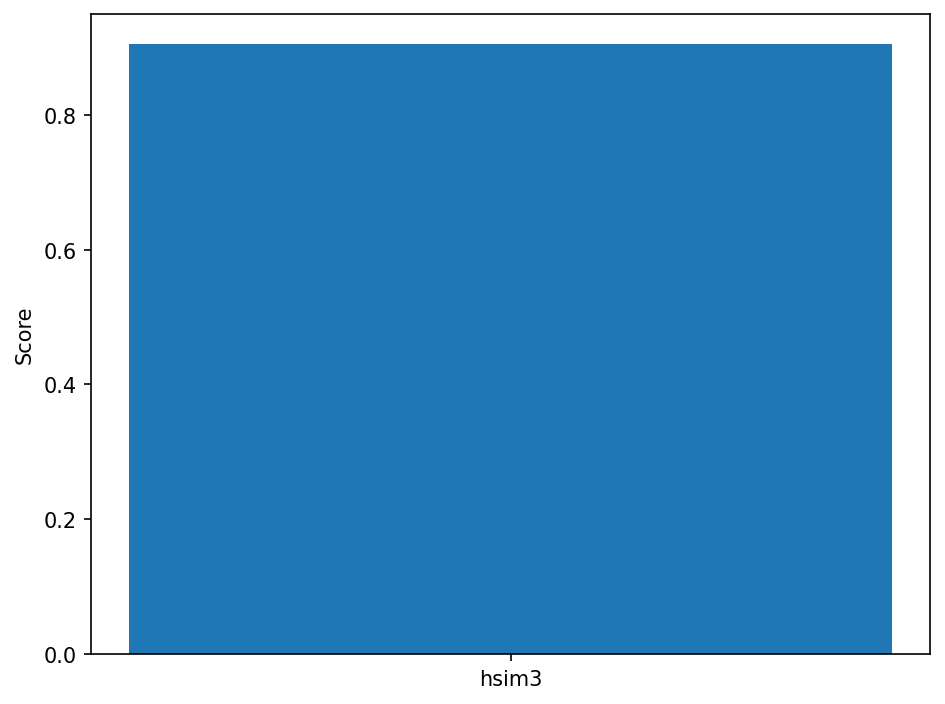

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.yorktown.fake_yorktown.FakeYorktownV2'> CIRCUIT_NAME: marmin_bell_3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.4885


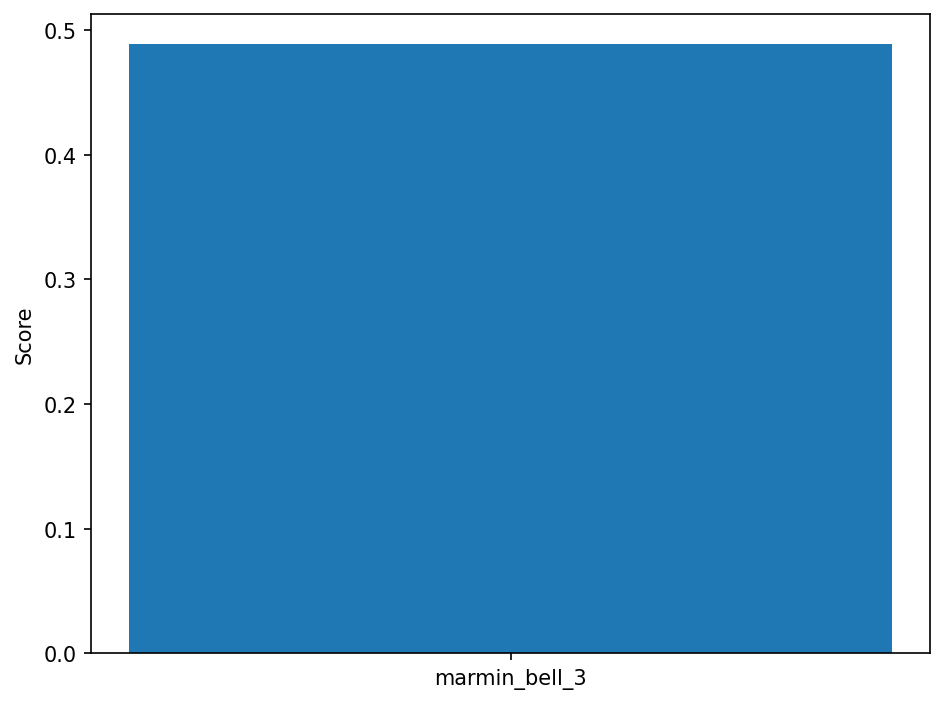

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.yorktown.fake_yorktown.FakeYorktownV2'> CIRCUIT_NAME: qaoa_swap_proxy3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.39666580935493634


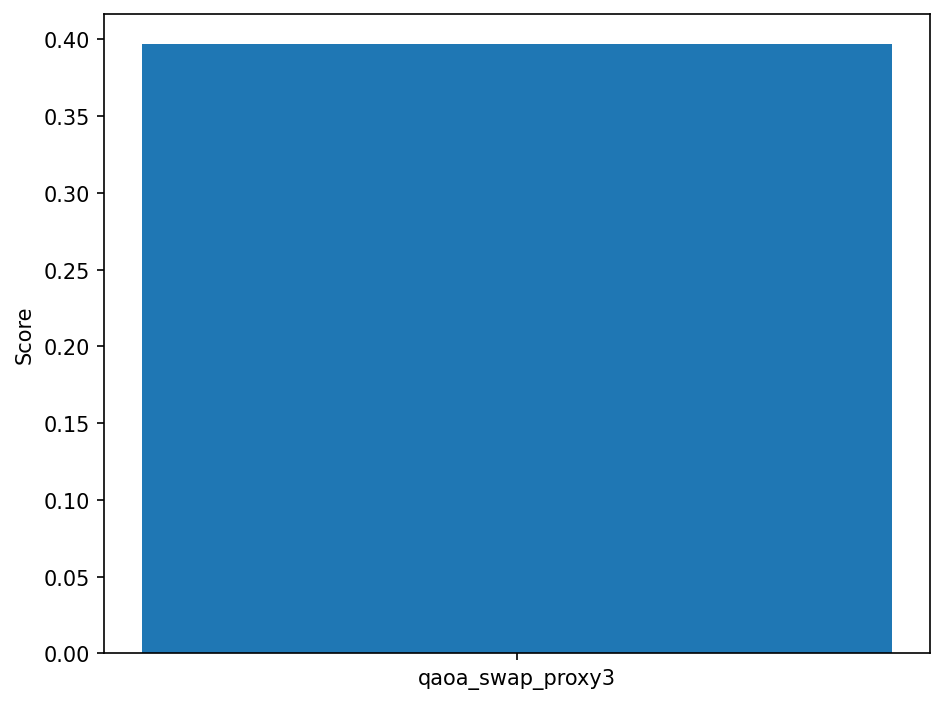

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.yorktown.fake_yorktown.FakeYorktownV2'> CIRCUIT_NAME: qaoa_vanilla_proxy3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.7900000411335955


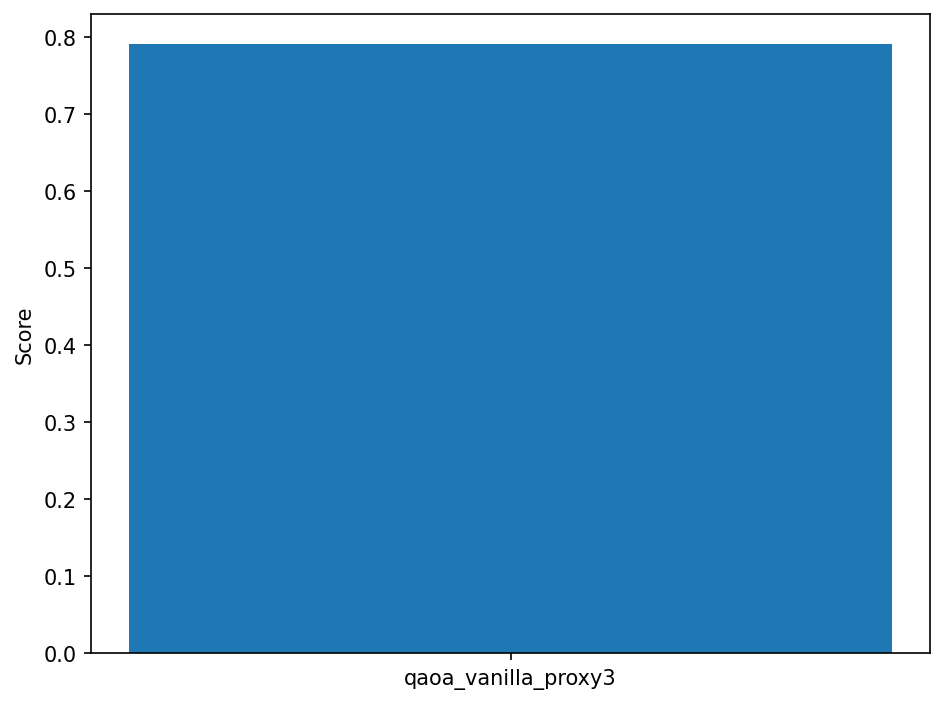

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.prague.fake_prague.FakePrague'> CIRCUIT_NAME: bitcode3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.0


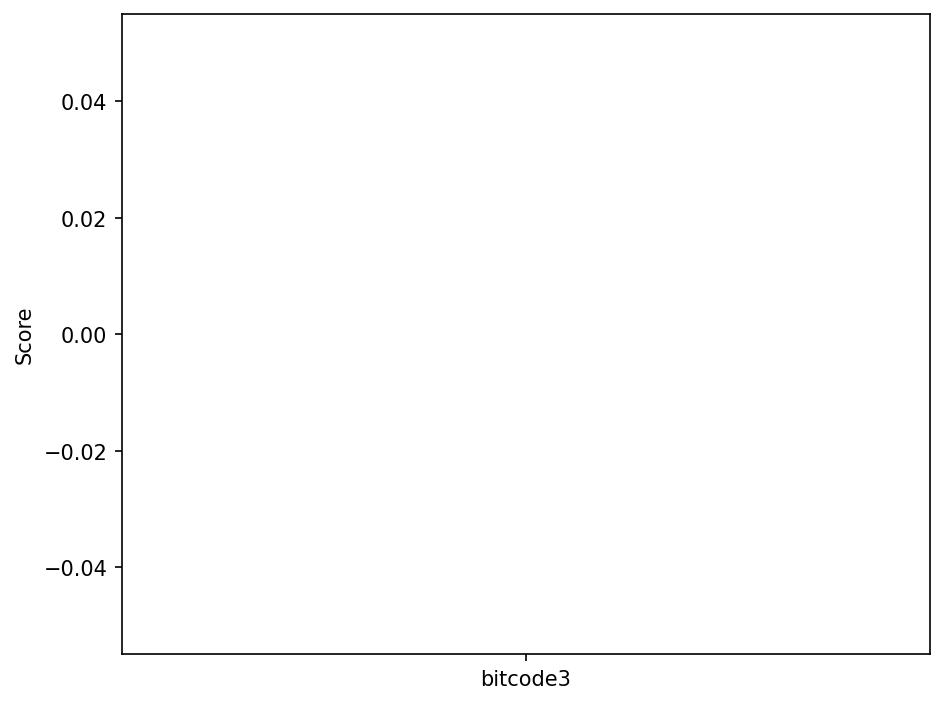

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.prague.fake_prague.FakePrague'> CIRCUIT_NAME: ghz3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.9584718154547301


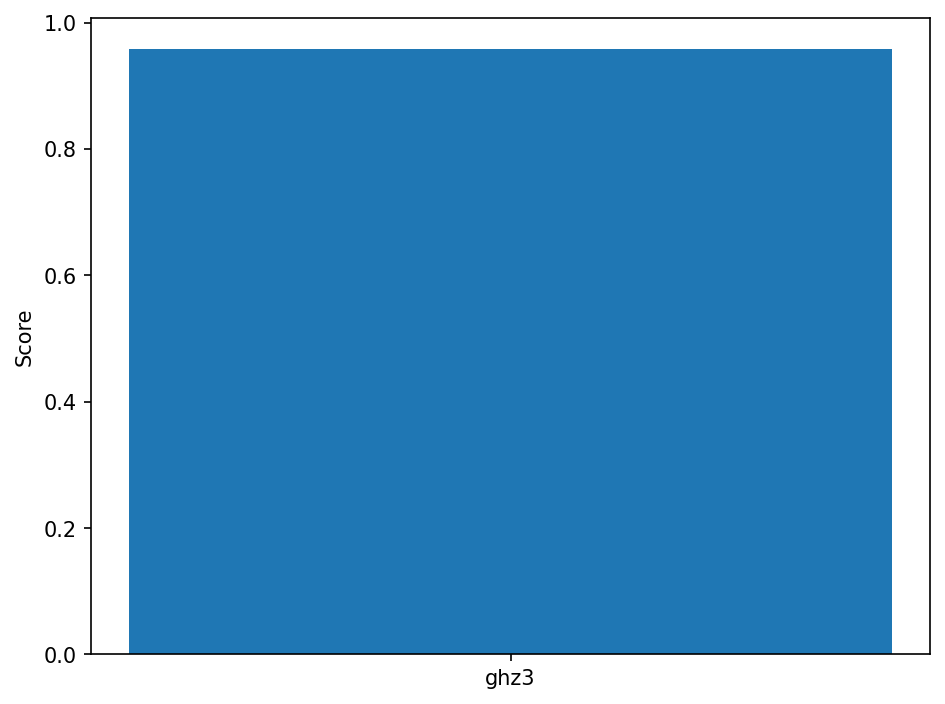

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.prague.fake_prague.FakePrague'> CIRCUIT_NAME: hsim3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.9724466094067259


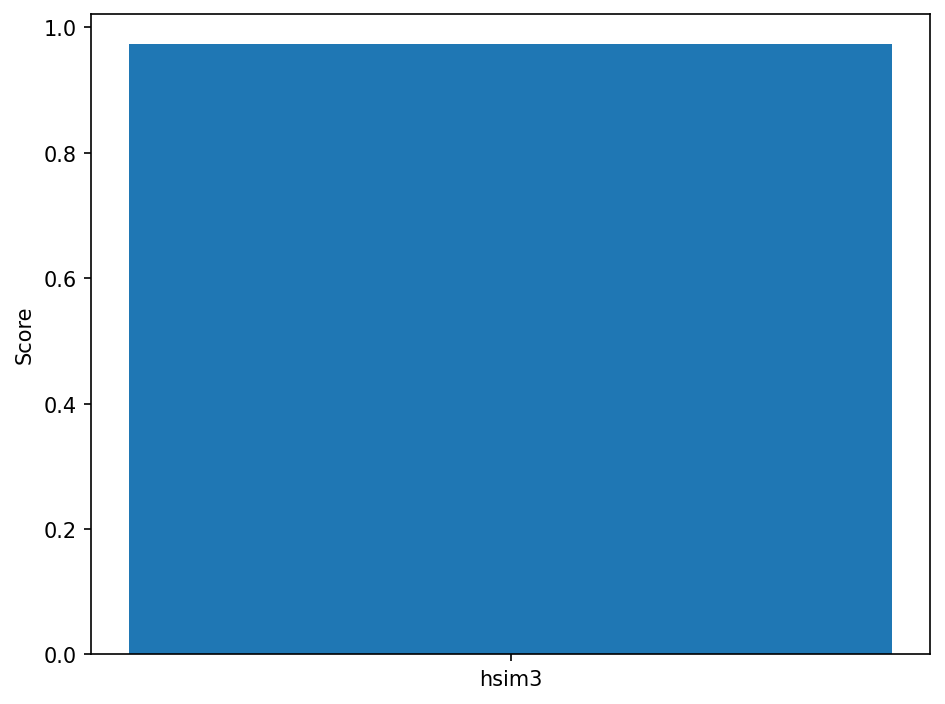

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.prague.fake_prague.FakePrague'> CIRCUIT_NAME: marmin_bell_3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.4945


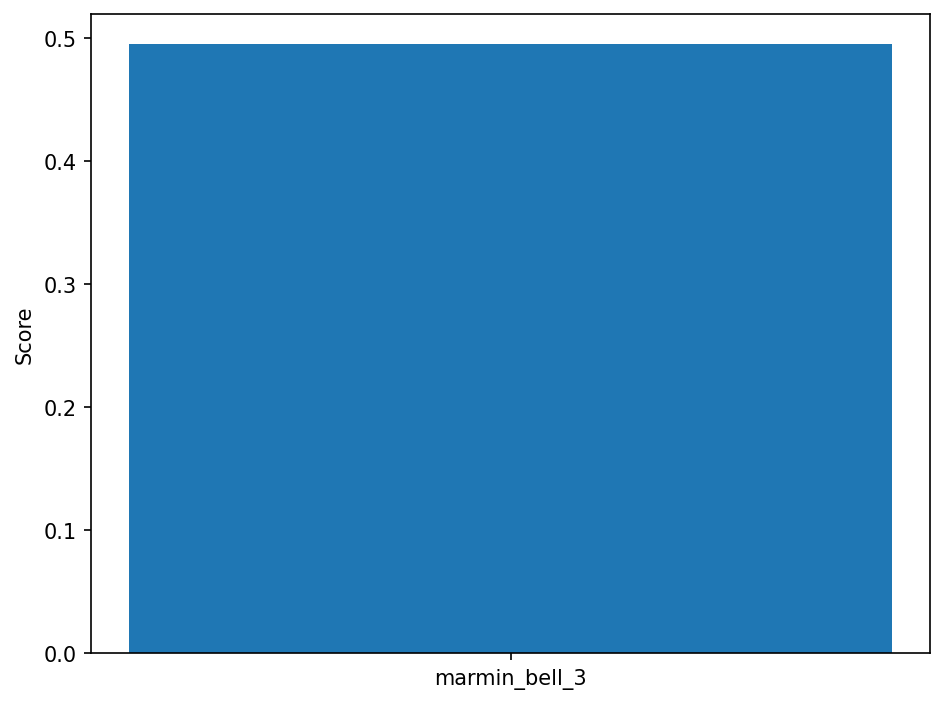

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.prague.fake_prague.FakePrague'> CIRCUIT_NAME: qaoa_swap_proxy3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.3473320667243899


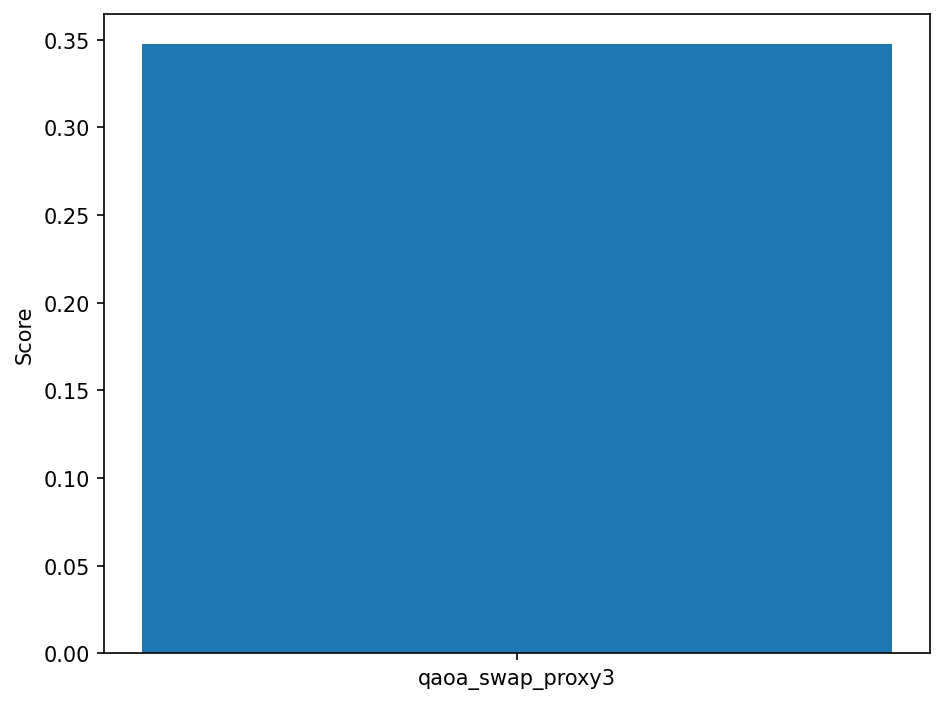

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.prague.fake_prague.FakePrague'> CIRCUIT_NAME: qaoa_vanilla_proxy3 COUNTS : {'110': 7, '111': 5, '011': 5, '100': 6, '001': 16, '101': 469, '000': 5, '010': 487} ; SCORE = 0.9706667334260194


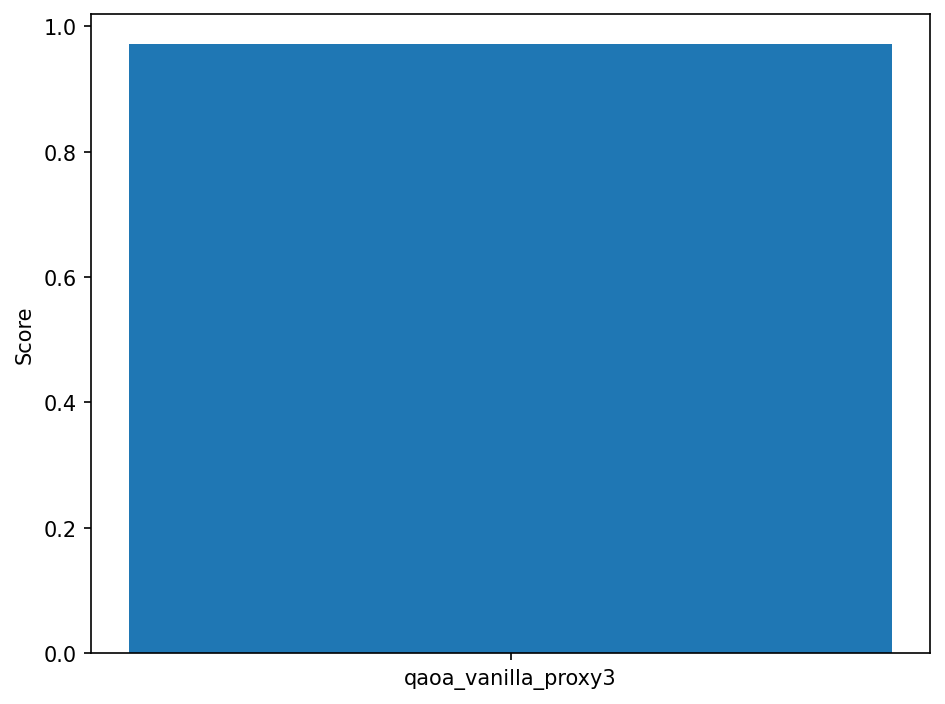

-----------------------------------------------------------


In [7]:
for label,benchmark,backend,job,score in jobs:
    print("USED BACKEND::",backend,"CIRCUIT_NAME:",label,"COUNTS :", counts, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

In [12]:
names=[]
for keys , values in all_scores.items():
    print(values, "-------------" ,keys)
    #keys=[]
    #keys.append(values)
    #ames.append(values)
    #supermarq.plotting.plot_correlations(benchmark_features,[keys],["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=[values],
                                     show=True,)
#names

{'bitcode3': 0.0, 'ghz3': 0.8869997181509816, 'hsim3': 0.9507799427400593, 'marmin_bell_3': 0.4895, 'qaoa_swap_proxy3': 0.3739989546327933, 'qaoa_vanilla_proxy3': 0.903333390542127} ------------- device_score_fake_bogota
{'bitcode3': 0.0, 'ghz3': 0.962885500404821, 'hsim3': 0.9952200572599408, 'marmin_bell_3': 0.5, 'qaoa_swap_proxy3': 0.333331950572478, 'qaoa_vanilla_proxy3': 0.9846667354117792} ------------- device_score_fake_armonk
{'bitcode3': 0.0, 'ghz3': 0.8697096267933266, 'hsim3': 0.9397799427400593, 'marmin_bell_3': 0.4925, 'qaoa_swap_proxy3': 0.37933233221447404, 'qaoa_vanilla_proxy3': 0.8873333882726874} ------------- device_score_fake_melbourne
{'bitcode3': 0.0, 'ghz3': 0.7655340298978615, 'hsim3': 0.9037799427400592, 'marmin_bell_3': 0.4885, 'qaoa_swap_proxy3': 0.39666580935493634, 'qaoa_vanilla_proxy3': 0.7900000411335955} ------------- device_score_fake_yorktown
{'bitcode3': 0.0, 'ghz3': 0.9584718154547301, 'hsim3': 0.9724466094067259, 'marmin_bell_3': 0.4945, 'qaoa_swap_

In [ ]:
names[0]

In [ ]:

supermarq.plotting.plot_correlations(benchmark_features,
                                     names,
                                     ["PC", "CD", "Ent", "Liv", "Mea", "Par"],
                                     device_name=["aer_dm_sim","FakeRueschlikon"],
                                     show=True,)